In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset
data = pd.read_csv('Housing.csv')

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [4]:
data.shape


(545, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


# 4. Perform descriptive statistics on the dataset.

In [6]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
data.mean()

C:\Users\rnt44\AppData\Local\Temp\ipykernel_21176\531903386.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


price        4.766729e+06
area         5.150541e+03
bedrooms     2.965138e+00
bathrooms    1.286239e+00
stories      1.805505e+00
parking      6.935780e-01
dtype: float64

In [8]:
data.median()

C:\Users\rnt44\AppData\Local\Temp\ipykernel_21176\4184645713.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


price        4340000.0
area            4600.0
bedrooms           3.0
bathrooms          1.0
stories            2.0
parking            0.0
dtype: float64

In [9]:
data.mode()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,3500000,6000.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,semi-furnished
1,4200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 5. Check for Missing values and deal with them.

In [10]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [11]:
data


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


# 6. Find the outliers and replace them outliers

In [12]:
#extracting numerical columns values
x_stat = data.iloc[:,0:5]

<Axes: >

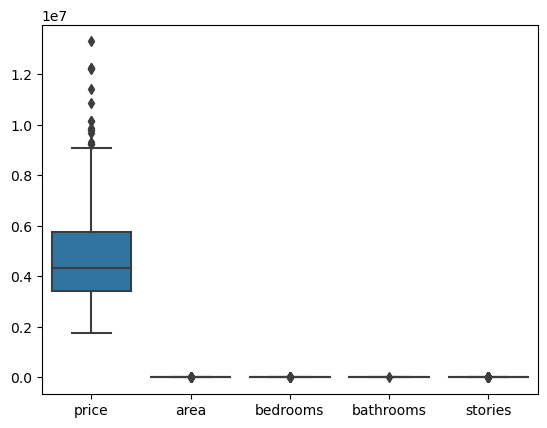

In [13]:
#checking outliers by boxplot to numerical values
sns.boxplot(x_stat)

In [14]:
#Calculating quartiles for x_stat
quantile = x_stat.quantile(q=[0.25,0.75])
quantile

,price,area,bedrooms,bathrooms,stories
0.25,3430000.0,3600.0,2.0,1.0,1.0
0.75,5740000.0,6360.0,3.0,2.0,2.0


In [15]:
#IQR
IQR = quantile.iloc[1] - quantile.iloc[0]
IQR

price        2310000.0
area            2760.0
bedrooms           1.0
bathrooms          1.0
stories            1.0
dtype: float64

In [16]:
#calculating upper extreme
upper_extreme = quantile.iloc[1] + (1.5*IQR)
upper_extreme

price        9205000.0
area           10500.0
bedrooms           4.5
bathrooms          3.5
stories            3.5
dtype: float64

In [17]:
#calculating lower extreme
lower_extreme = quantile.iloc[0] - (1.5*IQR)
lower_extreme

price       -35000.0
area          -540.0
bedrooms         0.5
bathrooms       -0.5
stories         -0.5
dtype: float64

In [18]:
#removing outliers from the extracted numeric columns

removed_outliers = x_stat[(x_stat >=lower_extreme)&(x_stat <=upper_extreme)]
removed_outliers

,price,area,bedrooms,bathrooms,stories
0,NaN,7420.0,4.0,2.0,3.0
1,NaN,8960.0,4.0,NaN,NaN
2,NaN,9960.0,3.0,2.0,2.0
3,NaN,7500.0,4.0,2.0,2.0
4,NaN,7420.0,4.0,1.0,2.0
...,...,...,...,...,...
540,1820000.0,3000.0,2.0,1.0,1.0
541,1767150.0,2400.0,3.0,1.0,1.0
542,1750000.0,3620.0,2.0,1.0,1.0
543,1750000.0,2910.0,3.0,1.0,1.0


In [19]:
#loading 'after removed outliers data' to actual dataset
#data[x_stat] = removed_outliers [removed_outliers.price,removed_outliers.area,removed_outliers.bedrooms,removed_outliers.bathrooms,removed_outliers.stories]


<Axes: >

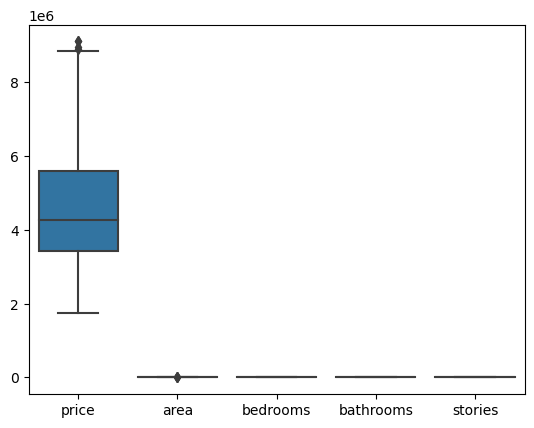

In [20]:
#Boxplot after removing outliers
sns.boxplot(removed_outliers)

# 7. Check for Categorical columns and perform encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [22]:
le=LabelEncoder()


In [23]:
ohe=OneHotEncoder()

In [24]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [25]:
#label encoding
data.mainroad=le.fit_transform(data.mainroad)
data.guestroom=le.fit_transform(data.guestroom)
data.basement=le.fit_transform(data.basement)
data.hotwaterheating=le.fit_transform(data.hotwaterheating)
data.airconditioning=le.fit_transform(data.airconditioning)

In [26]:
#onehotencoding
data=pd.get_dummies(data,columns=['furnishingstatus'])

In [27]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,1,0,0


# 8. Split the data into dependent and independent variables. 

In [28]:
x=data.drop(columns=['price'],axis = 1) #independent values
y=data['price'] #dependent value

In [29]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,8960,4,4,4,1,0,0,0,1,3,1,0,0
2,9960,3,2,2,1,0,1,0,0,2,0,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,7420,4,1,2,1,1,1,0,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,2910,3,1,1,0,0,0,0,0,0,1,0,0


In [30]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

# 9. Scale the independent variables


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [32]:
name = x.columns
scale1=StandardScaler()
scale2=MinMaxScaler()

In [33]:
x=scale1.fit_transform(x)

In [34]:
x

array([[ 1.04672629,  1.40341936,  1.42181174, ...,  1.70084013,
        -0.84488844, -0.6964292 ],
       [ 1.75700953,  1.40341936,  5.40580863, ...,  1.70084013,
        -0.84488844, -0.6964292 ],
       [ 2.21823241,  0.04727831,  1.42181174, ..., -0.58794474,
         1.18358821, -0.6964292 ],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, ..., -0.58794474,
        -0.84488844,  1.43589615],
       [-1.03338891,  0.04727831, -0.57018671, ...,  1.70084013,
        -0.84488844, -0.6964292 ],
       [-0.5998394 ,  0.04727831, -0.57018671, ..., -0.58794474,
        -0.84488844,  1.43589615]])

In [35]:
x=scale2.fit_transform(x)

In [36]:
x

array([[0.39656357, 0.6       , 0.33333333, ..., 1.        , 0.        ,
        0.        ],
       [0.5024055 , 0.6       , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.57113402, 0.4       , 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.13539519, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.08659794, 0.4       , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.15120275, 0.4       , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [37]:
x=pd.DataFrame(x,columns=name)
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0
1,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,1.0,0.0,0.0
2,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,1.0,0.0
3,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0
4,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0.0,1.0
541,0.051546,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0
542,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
543,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0


# 10. Split the data into training and testing

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)

# 11. Build the Model

In [40]:
#MultiLinear Regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()

# 12. Train the Model

In [41]:
model.fit(x_train,y_train)

LinearRegression()

# 13. Test the Model

In [42]:
pred=model.predict(x_test)

In [43]:
pred

array([ 2564877.39203859,  3880568.73025333,  6083401.85100556,
        3924052.28566333,  6841413.1686004 ,  6556370.81340139,
        3757039.57550234,  2958297.52885801,  5508898.15670987,
        3012228.89731705,  5084737.02455996,  2071186.36773972,
        3770953.64298732,  4762066.96099176,  6043741.32685617,
        2500037.24592876,  7473354.86111038,  6034720.79966668,
        5532222.6651309 ,  4635050.97660706,  2627436.46662761,
        1869967.14072887,  6486607.51739587,  5549939.82006006,
        6304107.85255511,  5877340.61606949,  3797209.39826533,
        3836367.07101634,  3149705.39982323,  3893973.95503341,
        3823938.0670732 ,  5258158.01443662,  5855779.1920743 ,
        5025192.30623174,  7770905.77878658,  5329841.72287168,
        6119058.50798953,  2248164.42742042,  4914345.69500159,
        5662467.57957469,  5108397.0895841 ,  5670077.33528372,
        2914357.38868774,  5981862.94624893,  5452861.07150762,
        7142022.57712755,  8882055.97085

In [44]:
y_test

482    2940000
314    4095000
383    3570000
487    2870000
43     7700000
        ...   
98     6293000
307    4165000
399    3500000
214    4865000
173    5250000
Name: price, Length: 109, dtype: int64

In [45]:
E=pred-y_test
E

482   -3.751226e+05
314   -2.144313e+05
383    2.513402e+06
487    1.054052e+06
43    -8.585868e+05
           ...     
98     4.746236e+04
307    1.722595e+05
399    8.480024e+05
214   -1.493859e+06
173    4.246808e+03
Name: price, Length: 109, dtype: float64

# 14. Measure the performance using Metrics

In [46]:
#r2_score
from sklearn.metrics import r2_score
r2=r2_score(pred,y_test)
r2

0.6888810961105716

In [47]:
#mean_squared_error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(pred,y_test)
mse

767515758952.394

In [48]:
#mean_absolute_error
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(pred,y_test)
mae

721746.5049148466